In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

movie_metadata.csv



In [ ]:
%matplotlib inline 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score, ShuffleSplit, train_test_split
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import linear_model
import pandas as pd
import numpy as np

%matplotlib inline
#import seaborn as sns
#sns.set_style("white")
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Step 1(a): Importing Dataset
----------------------------


In [ ]:
import pandas as pd
datasource = pd.read_csv('../input/movie_metadata.csv', delimiter=',')

datasource = datasource.dropna(how='any')  #Removing all the rows with Null/NaN values. 
#This step is done because NaN values in features will give an error when we try to fit linear regression model.

In [ ]:
datasource.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [ ]:
datasource.shape[0] #Actual Dataset from Kaggle had 5043 rows, after removing the NaN values there are 3756 rows in the dataframe.

3756

In [ ]:
datasource.shape[1] # 28 columns in the dataframe

28

After looking at the dataset, I have decided to predict imdb_score (Label/Target). Also, I need to consider only those features which have numerical values in them because features which have text value (for e.g. "director_name", "actor_2_name" etc ) in them will not fit into the models.

Step 1(b): Feature & Label Preparation
--------------------------------------

From the "datasource" Dataframe, I am only fetching features/columns which contain Numerical values, I am storing this into a dataframe called as "Features".
Secondly, I am storing my
 label "imdb_score" into the dataframe called "Label".

In [ ]:
Features=datasource[[2,3,4,5,7,8,12,13,18,22,24,26,27]] 

In [ ]:
type(Features)

pandas.core.frame.DataFrame

In [ ]:
Features.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,2.35,24000


In [ ]:
Label=datasource[[25]]

In [ ]:
LabelMatrix = Label.as_matrix()
FeaturesMatrix = Features.as_matrix() #This Matrix will be used in finding best features using Random Forest

Step 1(c): Renaming
-------------------

- Features --> IMDB_Features_df
- Label --> IMDB_Label_df
- IMDB_Features_df + IMDB_Label_df --> IMDB_df

In [ ]:
IMDB_Features_df = pd.DataFrame(Features, columns= ["num_critic_for_reviews","duration","director_facebook_likes",
                                                    "actor_3_facebook_likes","actor_1_facebook_likes","gross","num_voted_users",
                                                    "cast_total_facebook_likes","num_user_for_reviews","budget",
                                                     "actor_2_facebook_likes","aspect_ratio","movie_facebook_likes"])



In [ ]:
IMDB_Label_df = pd.DataFrame(Label, columns= ["imdb_score"])

In [ ]:
IMDB_df = IMDB_Features_df

In [ ]:
IMDB_df = pd.concat((IMDB_Features_df, IMDB_Label_df), axis=1)

In [ ]:
print ("Number of observations: {}\nNumber of features {}".\
    format(IMDB_df.shape[0], IMDB_df.shape[1]))

Number of observations: 3756
Number of features 14


In [ ]:
IMDB_df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,936.0,1.78,33000,7.9
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,5000.0,2.35,0,7.1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,393.0,2.35,85000,6.8
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,23000.0,2.35,164000,8.5
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,632.0,2.35,24000,6.6


Finding out the Accuracy of Linear Regression for all features

> Bloco com recuo


--------------------------------------------------------------

In [ ]:
# baseline - what's the score of all the features? Answer: Not very good. we can do better.
scores = cross_val_score(linear_model.LinearRegression(), IMDB_Features_df, IMDB_Label_df, scoring='r2') # mean_squared_error
print("Linear Regression Accuracy all Features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#We are going to further select best features and then try to find out the accuracy again

Linear Regression Accuracy all Features: 0.19 (+/- 0.27)


Step 2: Select Best Features
----------------------------

We are going to use three methods to select the best features for predicting "imdb_score"
The three methods for getting scores for features are: Pearson, SelectKBest and RandomForestRegressor

Step 2(a) : Pearson
-------------------

Finding out features which are correlated with the label (imdb_score)

In [ ]:
IMDB_df.corr(method='pearson') # We are getting similar results for - pearson, kendall, spearman
# Top 3 Features:
#num_voted_users
#duration
#num_critic_for_reviews

NameError: ignored

Step 2(b) : SelectKBest
-----------------------

In [ ]:
# Return the 2 features with highest variance 
IMDB_best2 = SelectKBest(f_regression, k=2).fit_transform(IMDB_Features_df, IMDB_Label_df) 

In [ ]:
IMDB_best2 
#Top 2 features 
# duration
# num_voted_users

array([[  1.78000000e+02,   8.86204000e+05],
       [  1.69000000e+02,   4.71220000e+05],
       [  1.48000000e+02,   2.75868000e+05],
       ..., 
       [  7.70000000e+01,   7.26390000e+04],
       [  8.10000000e+01,   5.20550000e+04],
       [  9.00000000e+01,   4.28500000e+03]])

Step 2(c) : Random Forest Regressor
-----------------------------------

In [ ]:
names1=["num_critic_for_reviews","duration","director_facebook_likes","actor_3_facebook_likes","actor_1_facebook_likes","gross","num_voted_users",
              "cast_total_facebook_likes","num_user_for_reviews","budget","actor_2_facebook_likes",
          "aspect_ratio","movie_facebook_likes"]

In [ ]:
# univariate feature selection using Random Forest Regressor
# this is a different approach, but confirms our best two features
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores1 = []
for i in range(FeaturesMatrix.shape[1]):
     score = cross_val_score(rf, FeaturesMatrix[:, i:i+1], LabelMatrix, scoring="r2",  #'mean_squared_error' sklearn impl is negative.
                              cv=ShuffleSplit(n=len(FeaturesMatrix), n_iter=10, test_size=.1))
     scores1.append((round(np.mean(score), 10), names1[i]))
scores1_df = pd.DataFrame(scores1, columns = ['score', 'feature'])
scores1_df.sort_values(['score'], ascending=False)

,score,feature
6,0.263116,num_voted_users
1,0.171621,duration
12,0.163965,movie_facebook_likes
2,0.121760,director_facebook_likes
8,0.117533,num_user_for_reviews
0,0.106174,num_critic_for_reviews
7,0.064173,cast_total_facebook_likes
5,0.060326,gross
4,0.053755,actor_1_facebook_likes
3,0.023306,actor_3_facebook_likes


- 1) As we notice that after the top six features, the scores is drastically decreasing.
- 2) (a) We see some common features from the previous methods: num_voted_users and duration.
- 2) (b) We are going to use num_voted_users to fit the model,
- 2) (c) then we will use num_voted_users and duration,
- 2) (d) finally we will use the top 6 features from Random Forest Regressor: num_voted_users, movie_facebook_likes, duration, director_facebook_likes, num_user_for_reviews, num_critic_for_reviews

Step 3 : Splitting the dataset into Train, Test, Validation Dataset
-------------------------------------------------------------------

Train:80% , Test: 10% , Vaidation: 10%

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
X_train_validation, X_test, y_train_validation, y_test = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.1, 
                                                                          random_state = 0)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, 
                                                                y_train_validation, 
                                                                test_size = 0.1, 
                                                                random_state = 0)


Train:70% , Test: 20% , Validation: 10%

In [ ]:
X_train_validation1, X_test1, y_train_validation1, y_test1 = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.2, 
                                                                          random_state = 0)

In [ ]:
X_train1, X_validation1, y_train1, y_validation1 = train_test_split(X_train_validation1, 
                                                                y_train_validation1, 
                                                                test_size = 0.1, 
                                                                random_state = 0)

Train:50% , Test: 40%

In [ ]:
X_train_validation2, X_test2, y_train_validation2, y_test2 = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.4, 
                                                                          random_state = 0)

In [ ]:

X_train2, X_validation2, y_train2, y_validation2 = train_test_split(X_train_validation2, 
                                                                y_train_validation2, 
                                                                test_size = 0.15, 
                                                                random_state = 0)

Train : 30 % , Test : 60%

In [ ]:
X_train_validation3, X_test3, y_train_validation3, y_test3 = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.6, 
                                                                          random_state = 0)

In [ ]:

X_train3, X_validation3, y_train3, y_validation3 = train_test_split(X_train_validation3, 
                                                                y_train_validation3, 
                                                                test_size = 0.2, 
                                                                random_state = 0)

Train : 15 %, Test : 80%

In [ ]:
X_train_validation4, X_test4, y_train_validation4, y_test4 = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.8, 
                                                                          random_state = 0)

In [ ]:
X_train_validation4, X_test4, y_train_validation4, y_test4 = train_test_split(IMDB_Features_df, 
                                                                          IMDB_Label_df, 
                                                                          test_size = 0.8, 
                                                                          random_state = 0)

Feature Set 1 (FS1)
-------------------

num_voted_users RF(1), SelectKBest(2), Pearson(1)

Feature Set 2 (FS2)
-------------------

- num_voted_users, duration num_voted_users: RF(1), SelectKBest(2), Pearson(1) 
- duration: RF(3), SelectKBest(1), Pearson(2)

Feature Set 3 (FS3)
-------------------

Considering top 6 features from RF: num_voted_users, movie_facebook_likes, duration, director_facebook_likes, num_user_for_reviews, num_critic_for_reviews

In [ ]:
FS1 = pd.DataFrame(IMDB_Features_df["num_voted_users"])

In [ ]:
columns= ['num_voted_users','duration']
FS2 = pd.DataFrame(IMDB_Features_df, columns=columns)

#columns= ['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']


In [ ]:
columns= ["num_voted_users", "movie_facebook_likes", "duration", "director_facebook_likes", "num_user_for_reviews", "num_critic_for_reviews"]
FS3 = pd.DataFrame(IMDB_Features_df, columns=columns)

In [ ]:
# Let's assess the accuracy of some other models.
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
nn3_model = KNeighborsRegressor(n_neighbors=3)
nn5_model = KNeighborsRegressor(n_neighbors=5)
nn7_model = KNeighborsRegressor(n_neighbors=7)
nn9_model = KNeighborsRegressor(n_neighbors=9)
regr = linear_model.LinearRegression()
decision_tree = tree.DecisionTreeRegressor()
poly2 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly4 = Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression(fit_intercept=False))])
poly5 = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])
rf = RandomForestRegressor()
models = [ {'name' : '3-Nearest Neighbors', 'estimator' : nn3_model},
          {'name' : '5-Nearest Neighbors', 'estimator' : nn5_model},
          {'name' : '7-Nearest Neighbors', 'estimator' : nn7_model},
          {'name' : '9-Nearest Neighbors', 'estimator' : nn9_model},
          {'name' : 'Linear Regression', 'estimator' : regr},
          {'name' : 'Decision Tree', 'estimator' : decision_tree},
          {'name' : 'Random Forest', 'estimator' : rf}
         ]
for model in models:
    scores = cross_val_score(model['estimator'], FS1, IMDB_Label_df, cv=ShuffleSplit(n=len(FS1), n_iter=10, test_size=.1), scoring='r2' )
    print(" %s Accuracy: %0.2f (+/- %0.2f)" % (model['name'], scores.mean(), scores.std() * 2))

 3-Nearest Neighbors Accuracy: 0.02 (+/- 0.15)
 5-Nearest Neighbors Accuracy: 0.14 (+/- 0.11)
 7-Nearest Neighbors Accuracy: 0.15 (+/- 0.10)
 9-Nearest Neighbors Accuracy: 0.20 (+/- 0.14)
 Linear Regression Accuracy: 0.22 (+/- 0.07)
 Decision Tree Accuracy: -0.42 (+/- 0.29)
 Random Forest Accuracy: -0.16 (+/- 0.14)


In [ ]:
# Let's assess the accuracy of some other models.
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
nn3_model = KNeighborsRegressor(n_neighbors=3)
nn5_model = KNeighborsRegressor(n_neighbors=5)
nn7_model = KNeighborsRegressor(n_neighbors=7)
nn9_model = KNeighborsRegressor(n_neighbors=9)
regr = linear_model.LinearRegression()
decision_tree = tree.DecisionTreeRegressor()
poly2 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly4 = Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression(fit_intercept=False))])
poly5 = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])
rf = RandomForestRegressor()
models = [ {'name' : '3-Nearest Neighbors', 'estimator' : nn3_model},
          {'name' : '5-Nearest Neighbors', 'estimator' : nn5_model},
          {'name' : '7-Nearest Neighbors', 'estimator' : nn7_model},
          {'name' : '9-Nearest Neighbors', 'estimator' : nn9_model},
          {'name' : 'Linear Regression', 'estimator' : regr},
          {'name' : 'Decision Tree', 'estimator' : decision_tree},
          {'name' : 'Random Forest', 'estimator' : rf}
         ]
for model in models:
    scores = cross_val_score(model['estimator'], FS2, IMDB_Label_df, cv=ShuffleSplit(n=len(FS2), n_iter=10, test_size=.1), scoring='r2' )
    print(" %s Accuracy: %0.2f (+/- %0.2f)" % (model['name'], scores.mean(), scores.std() * 2))

 3-Nearest Neighbors Accuracy: 0.03 (+/- 0.08)
 5-Nearest Neighbors Accuracy: 0.14 (+/- 0.12)
 7-Nearest Neighbors Accuracy: 0.18 (+/- 0.07)
 9-Nearest Neighbors Accuracy: 0.19 (+/- 0.08)
 Linear Regression Accuracy: 0.28 (+/- 0.05)
 Decision Tree Accuracy: -0.30 (+/- 0.28)
 Random Forest Accuracy: 0.14 (+/- 0.09)


In [ ]:
# Let's assess the accuracy of some other models.
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
nn3_model = KNeighborsRegressor(n_neighbors=3)
nn5_model = KNeighborsRegressor(n_neighbors=5)
nn7_model = KNeighborsRegressor(n_neighbors=7)
nn9_model = KNeighborsRegressor(n_neighbors=9)
regr = linear_model.LinearRegression()
decision_tree = tree.DecisionTreeRegressor()
poly2 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
poly3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
poly4 = Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression(fit_intercept=False))])
poly5 = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', LinearRegression(fit_intercept=False))])
rf = RandomForestRegressor()
models = [ {'name' : '3-Nearest Neighbors', 'estimator' : nn3_model},
          {'name' : '5-Nearest Neighbors', 'estimator' : nn5_model},
          {'name' : '7-Nearest Neighbors', 'estimator' : nn7_model},
          {'name' : '9-Nearest Neighbors', 'estimator' : nn9_model},
          {'name' : 'Linear Regression', 'estimator' : regr},
          {'name' : 'Decision Tree', 'estimator' : decision_tree},
          {'name' : 'Random Forest', 'estimator' : rf}
         ]
for model in models:
    scores = cross_val_score(model['estimator'], FS3, IMDB_Label_df, cv=ShuffleSplit(n=len(FS3), n_iter=10, test_size=.1), scoring='r2' )
    print(" %s Accuracy: %0.2f (+/- %0.2f)" % (model['name'], scores.mean(), scores.std() * 2))

 3-Nearest Neighbors Accuracy: 0.07 (+/- 0.10)
 5-Nearest Neighbors Accuracy: 0.16 (+/- 0.10)
 7-Nearest Neighbors Accuracy: 0.22 (+/- 0.09)
 9-Nearest Neighbors Accuracy: 0.23 (+/- 0.07)
 Linear Regression Accuracy: 0.31 (+/- 0.05)
 Decision Tree Accuracy: -0.16 (+/- 0.25)
 Random Forest Accuracy: 0.37 (+/- 0.11)


Linear Regression Train Test Error
----------------------------------

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1 = LinearRegression().fit(X_train[['num_voted_users']], y_train)
model2 = LinearRegression().fit(X_train[['num_voted_users', 'duration']], y_train)
model3 = LinearRegression().fit(X_train[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train)



model4 = LinearRegression().fit(X_train1[['num_voted_users']], y_train1)
model5 = LinearRegression().fit(X_train1[['num_voted_users', 'duration']], y_train1)
model6 = LinearRegression().fit(X_train1[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train1)



model7 = LinearRegression().fit(X_train2[['num_voted_users']], y_train2)
model8 = LinearRegression().fit(X_train2[['num_voted_users', 'duration']], y_train2)
model9 = LinearRegression().fit(X_train2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train2)


model10 = LinearRegression().fit(X_train3[['num_voted_users']], y_train3)
model11 = LinearRegression().fit(X_train3[['num_voted_users', 'duration']], y_train3)
model12 = LinearRegression().fit(X_train3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train3)

model13 = LinearRegression().fit(X_train4[['num_voted_users']], y_train4)
model14 = LinearRegression().fit(X_train4[['num_voted_users', 'duration']], y_train4)
model15 = LinearRegression().fit(X_train4[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']], y_train4)


In [ ]:
# Let's compute the training MSE
model1_train_err = ((model1.predict(X_train[['num_voted_users']]) - y_train)**2).mean()[0]
model2_train_err = ((model2.predict(X_train[['num_voted_users', 'duration']]) - y_train)**2).mean()[0]
model3_train_err = ((model3.predict(X_train[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train)**2).mean()[0]

model4_train_err = ((model4.predict(X_train1[['num_voted_users']]) - y_train1)**2).mean()[0]
model5_train_err = ((model5.predict(X_train1[['num_voted_users', 'duration']]) - y_train1)**2).mean()[0]
model6_train_err = ((model6.predict(X_train1[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train1)**2).mean()[0]

model7_train_err = ((model7.predict(X_train2[['num_voted_users']]) - y_train2)**2).mean()[0]
model8_train_err = ((model8.predict(X_train2[['num_voted_users', 'duration']]) - y_train2)**2).mean()[0]
model9_train_err = ((model9.predict(X_train2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train2)**2).mean()[0]

model10_train_err = ((model10.predict(X_train3[['num_voted_users']]) - y_train3)**2).mean()[0]
model11_train_err = ((model11.predict(X_train3[['num_voted_users', 'duration']]) - y_train3)**2).mean()[0]
model12_train_err = ((model12.predict(X_train3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train3)**2).mean()[0]


model13_train_err = ((model10.predict(X_train4[['num_voted_users']]) - y_train4)**2).mean()[0]
model14_train_err = ((model11.predict(X_train4[['num_voted_users', 'duration']]) - y_train4)**2).mean()[0]
model15_train_err = ((model12.predict(X_train4[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_train4)**2).mean()[0]


In [ ]:
[model1_train_err, model2_train_err, model3_train_err] # Models Trainded with 80% Training size

[0.84010486354326097, 0.78268345514416027, 0.75290426284622536]

In [ ]:
[model4_train_err, model5_train_err, model6_train_err] #Models Trainded with 70% Training size

[0.83854585072727283, 0.78125750120761228, 0.75470490096611176]

In [ ]:
[model7_train_err, model8_train_err, model9_train_err] #Models Trainded with 50% Training size

[0.84761183631620551, 0.7771904689298974, 0.74931677805763464]

In [ ]:
[model10_train_err, model11_train_err, model12_train_err] #Models Trainded with 30% Training size

[0.82933012856505495, 0.76481095989528447, 0.73193912113415527]

In [ ]:
[model13_train_err, model14_train_err, model15_train_err] #Models Trainded with 15% Training size

[0.76695925960914679, 0.7004544389609979, 0.66896956300956223]

In [ ]:
model1_test_err = ((model1.predict(X_test[['num_voted_users']]) - y_test)**2).mean()[0]
model2_test_err = ((model2.predict(X_test[['num_voted_users','duration']]) - y_test)**2).mean()[0]
model3_test_err = ((model3.predict(X_test[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test)**2).mean()[0]


model4_test_err = ((model4.predict(X_test1[['num_voted_users']]) - y_test1)**2).mean()[0]
model5_test_err = ((model5.predict(X_test1[['num_voted_users','duration']]) - y_test1)**2).mean()[0]
model6_test_err = ((model6.predict(X_test1[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test1)**2).mean()[0]

model7_test_err = ((model7.predict(X_test2[['num_voted_users']]) - y_test2)**2).mean()[0]
model8_test_err = ((model8.predict(X_test2[['num_voted_users','duration']]) - y_test2)**2).mean()[0]
model9_test_err = ((model9.predict(X_test2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test2)**2).mean()[0]

model10_test_err = ((model10.predict(X_test3[['num_voted_users']]) - y_test3)**2).mean()[0]
model11_test_err = ((model11.predict(X_test3[['num_voted_users','duration']]) - y_test3)**2).mean()[0]
model12_test_err = ((model12.predict(X_test3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test3)**2).mean()[0]

model13_test_err = ((model13.predict(X_test4[['num_voted_users']]) - y_test4)**2).mean()[0]
model14_test_err = ((model14.predict(X_test4[['num_voted_users','duration']]) - y_test4)**2).mean()[0]
model15_test_err = ((model15.predict(X_test4[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_test4)**2).mean()[0]

In [ ]:
[model1_test_err,model2_test_err, model3_test_err]

[0.87175392644886796, 0.8725128675368522, 0.85924613322242149]

In [ ]:
[model4_test_err,model5_test_err, model6_test_err]

[0.91136563512769697, 0.88919255538156794, 0.85876242842380834]

In [ ]:
[model7_test_err,model8_test_err, model9_test_err]

[0.8817155234796652, 0.85638686715211776, 0.82716865657879046]

In [ ]:
[model10_test_err,model11_test_err, model12_test_err]

[0.87302708517863969, 0.83165067451792185, 0.80886987511295771]

In [ ]:
[model13_test_err,model14_test_err, model15_test_err]

[0.86962649128219627, 0.8239391120877736, 0.79936002846900744]

Finding Training-Testing Converging Point
-----------------------------------------

In [ ]:
model9_test_err - model9_train_err

0.077851878521155826

In [ ]:
model12_test_err - model12_train_err

0.076930753978802446

In [ ]:
performance_train = [model3_train_err,model6_train_err, model9_train_err, model12_train_err,model15_train_err]

In [ ]:
performance_test = [ model3_test_err,  model6_test_err, model9_test_err, model12_test_err, model15_test_err]

In [ ]:
l_set = [80,70,50,30,15]

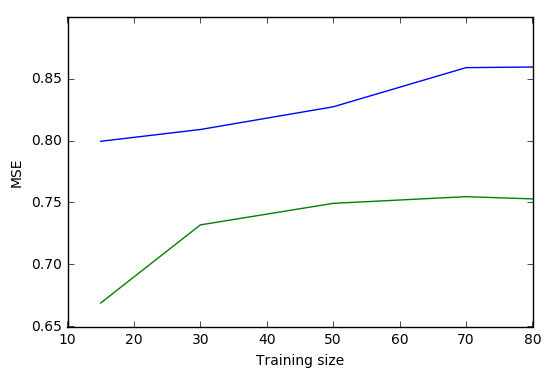

In [ ]:
plt.plot(l_set,performance_test, 'b', label='train (Test)')
plt.plot(l_set,performance_train, 'g', label='train (Train)')

#plt.legend();
plt.xlabel('Training size');
plt.ylabel('MSE');


Random Forest Regressor Train Test Error
----------------------------------------

In [ ]:
numpyMatrix = y_train.as_matrix()

numpyMatrix1 = y_train1.as_matrix()

numpyMatrix2 = y_train2.as_matrix()

numpyMatrix3 = y_train3.as_matrix()

numpyMatrix4 = y_train4.as_matrix()


In [ ]:
model_rf1 = RandomForestRegressor().fit(X_train[["num_voted_users"]],y_train)
model_rf2 = RandomForestRegressor().fit(X_train[["num_voted_users","duration"]],y_train)
model_rf3 = RandomForestRegressor().fit(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train)


model_rf4 = RandomForestRegressor().fit(X_train1[["num_voted_users"]],y_train1)
model_rf5 = RandomForestRegressor().fit(X_train1[["num_voted_users","duration"]],y_train1)
model_rf6 = RandomForestRegressor().fit(X_train1[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train1)

model_rf7 = RandomForestRegressor().fit(X_train2[["num_voted_users"]],y_train2)
model_rf8 = RandomForestRegressor().fit(X_train2[["num_voted_users","duration"]],y_train2)
model_rf9 = RandomForestRegressor().fit(X_train2[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train2)

model_rf10 = RandomForestRegressor().fit(X_train3[["num_voted_users"]],y_train3)
model_rf11 = RandomForestRegressor().fit(X_train3[["num_voted_users","duration"]],y_train3)
model_rf12 = RandomForestRegressor().fit(X_train3[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train3)

model_rf13 = RandomForestRegressor().fit(X_train4[["num_voted_users"]],y_train4)
model_rf14 = RandomForestRegressor().fit(X_train4[["num_voted_users","duration"]],y_train4)
model_rf15 = RandomForestRegressor().fit(X_train4[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]],y_train4)





In [ ]:
temp1 = model_rf1.predict(X_train[["num_voted_users"]])
temp2 = model_rf2.predict(X_train[["num_voted_users","duration"]])
temp3 = model_rf3.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp4 = model_rf4.predict(X_train[["num_voted_users"]])
temp5 = model_rf5.predict(X_train[["num_voted_users","duration"]])
temp6 = model_rf6.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp7 = model_rf7.predict(X_train[["num_voted_users"]])
temp8 = model_rf8.predict(X_train[["num_voted_users","duration"]])
temp9 = model_rf9.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp10 = model_rf10.predict(X_train[["num_voted_users"]])
temp11 = model_rf11.predict(X_train[["num_voted_users","duration"]])
temp12 = model_rf12.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp13 = model_rf13.predict(X_train[["num_voted_users"]])
temp14 = model_rf14.predict(X_train[["num_voted_users","duration"]])
temp15 = model_rf15.predict(X_train[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])




In [ ]:

model_rf1_train_err = ((temp1 - numpyMatrix)**2).mean()
model_rf2_train_err = ((temp2 - numpyMatrix)**2).mean()
model_rf3_train_err = ((temp3 - numpyMatrix)**2).mean()

model_rf4_train_err = ((temp4 - numpyMatrix1)**2).mean()
model_rf5_train_err = ((temp5 - numpyMatrix1)**2).mean()
model_rf6_train_err = ((temp6 - numpyMatrix1)**2).mean()

model_rf7_train_err = ((temp7 - numpyMatrix2)**2).mean()
model_rf8_train_err = ((temp8 - numpyMatrix2)**2).mean()
model_rf9_train_err = ((temp9 - numpyMatrix2)**2).mean()

model_rf10_train_err = ((temp10 - numpyMatrix3)**2).mean()
model_rf11_train_err = ((temp11 - numpyMatrix3)**2).mean()
model_rf12_train_err = ((temp12 - numpyMatrix3)**2).mean()

model_rf13_train_err = ((temp13 - numpyMatrix4)**2).mean()
model_rf14_train_err = ((temp14 - numpyMatrix4)**2).mean()
model_rf15_train_err = ((temp15 - numpyMatrix4)**2).mean()

In [ ]:
[model_rf1_train_err, model_rf2_train_err, model_rf3_train_err]

[1.8045775072752386, 1.8364195363962157, 1.8598091678586146]

In [ ]:
[model_rf4_train_err, model_rf5_train_err, model_rf6_train_err]

[1.8090637478506915, 1.8096044015671089, 1.8084507305784143]

In [ ]:
[model_rf7_train_err, model_rf8_train_err, model_rf9_train_err]

[1.8570667591562326, 1.8296378917092795, 1.816513749457122]

In [ ]:
[model_rf10_train_err, model_rf11_train_err, model_rf12_train_err]

[1.7217305370579312, 1.6964083161577499, 1.7032211247092472]

In [ ]:
[model_rf13_train_err, model_rf14_train_err, model_rf15_train_err]

[1.7114181284242835, 1.5715336050843756, 1.5763469690992775]

In [ ]:
Matrix = y_test.as_matrix()
Matrix1 = y_test1.as_matrix()
Matrix2 = y_test2.as_matrix()
Matrix3 = y_test3.as_matrix()
Matrix4 = y_test4.as_matrix()


In [ ]:
temp_test1 = model_rf1.predict(X_test[["num_voted_users"]])
temp_test2 = model_rf2.predict(X_test[["num_voted_users","duration"]])
temp_test3 = model_rf3.predict(X_test[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp_test4 = model_rf1.predict(X_test1[["num_voted_users"]])
temp_test5 = model_rf2.predict(X_test1[["num_voted_users","duration"]])
temp_test6 = model_rf3.predict(X_test1[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp_test7 = model_rf1.predict(X_test2[["num_voted_users"]])
temp_test8 = model_rf2.predict(X_test2[["num_voted_users","duration"]])
temp_test9 = model_rf3.predict(X_test2[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp_test10 = model_rf1.predict(X_test3[["num_voted_users"]])
temp_test11 = model_rf2.predict(X_test3[["num_voted_users","duration"]])
temp_test12 = model_rf3.predict(X_test3[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])

temp_test13 = model_rf1.predict(X_test[["num_voted_users"]])
temp_test14 = model_rf2.predict(X_test[["num_voted_users","duration"]])
temp_test15 = model_rf3.predict(X_test[["num_voted_users","movie_facebook_likes","duration","num_critic_for_reviews","num_user_for_reviews","director_facebook_likes"]])


In [ ]:
model_rf1_test_err = ((temp_test1 - Matrix)**2).mean()
model_rf2_test_err = ((temp_test2 - Matrix)**2).mean()
model_rf3_test_err = ((temp_test3 - Matrix)**2).mean()

model_rf4_test_err = ((temp_test4 - Matrix1)**2).mean()
model_rf5_test_err = ((temp_test5 - Matrix1)**2).mean()
model_rf6_test_err = ((temp_test6 - Matrix1)**2).mean()

model_rf7_test_err = ((temp_test7 - Matrix2)**2).mean()
model_rf8_test_err = ((temp_test8 - Matrix2)**2).mean()
model_rf9_test_err = ((temp_test9 - Matrix2)**2).mean()

model_rf10_test_err = ((temp_test10 - Matrix3)**2).mean()
model_rf11_test_err = ((temp_test11 - Matrix3)**2).mean()
model_rf12_test_err = ((temp_test12 - Matrix3)**2).mean()

model_rf13_test_err = ((temp_test13 - Matrix4)**2).mean()
model_rf14_test_err = ((temp_test14 - Matrix4)**2).mean()
model_rf15_test_err = ((temp_test15- Matrix4)**2).mean()

In [ ]:
[model_rf1_test_err, model_rf2_test_err, model_rf3_test_err]

[1.901717744316181, 1.7922101686283385, 1.7405025662064282]

In [ ]:
[model_rf4_test_err, model_rf5_test_err, model_rf6_test_err]

[1.9078799199690963, 1.8917962794250789, 1.8609299336521052]

In [ ]:
[model_rf7_test_err, model_rf8_test_err, model_rf9_test_err]

[1.8365061279076402, 1.8305556293489753, 1.8305301981975288]

In [ ]:
[model_rf10_test_err, model_rf11_test_err, model_rf12_test_err]

[1.8185391342666186, 1.8341176785980025, 1.8299171999064676]

In [ ]:
[model_rf13_test_err, model_rf14_test_err, model_rf15_test_err]

[1.8574815418544937, 1.7490968607285726, 1.6973106396254467]

In [ ]:
performance_train_rf = [model_rf3_train_err, model_rf6_train_err, model_rf9_train_err, model_rf12_train_err,model_rf15_train_err]

In [ ]:
performance_test_rf = [ model_rf3_test_err,  model_rf6_test_err, model_rf9_test_err, model_rf12_test_err, model_rf15_test_err]

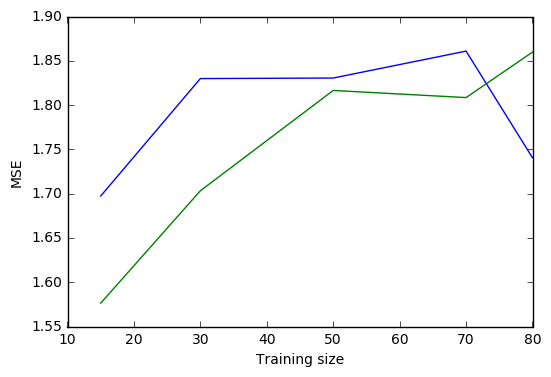

In [ ]:
plt.plot(l_set,performance_test_rf, 'b', label='train (Test)')
plt.plot(l_set,performance_train_rf, 'g', label='train (Train)')

#plt.legend();
plt.xlabel('Training size');
plt.ylabel('MSE');

LINEAR REGRESSION PREDICTION WITH FEATURE SET 3 & MODEL 12
----------------------------------------------------------

LR_set is the Validation Set

In [ ]:
LR_set= X_validation3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]

In [ ]:
P = y_validation3.as_matrix()
for i in range(0,301):
    XYZ = np.array(LR_set.iloc[i])
    lr_dp = model12.predict(XYZ)
    print("Linear Regression Prediction: ",lr_dp, "Actual: ", P[i:(i+1)])

ValueError: Got X with X.ndim=1. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

In [ ]:
model12_validation_err = ((model12.predict(X_validation3[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]) - y_validation3)**2).mean()[0]


In [ ]:
model12_validation_err

0.7336922135320425

RFR PREDICTION WITH FEATURE SET 3
---------------------------------

- RF_set is the Validation Dataset for model with FS3

In [ ]:
RF_set= X_validation2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']]

In [ ]:
P = y_validation2.as_matrix()
for i in range(0,338):
    XYZ = np.array(RF_set.iloc[i])
    rf_dp = model_rf9.predict(XYZ)
    print(" RFR Prediction: ",rf_dp, "Actual: ", P[i:(i+1)])

ValueError: Got X with X.ndim=1. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

In [ ]:

temp_rf_val = model_rf9.predict(X_validation2[['num_voted_users','movie_facebook_likes','duration','num_critic_for_reviews','num_user_for_reviews','director_facebook_likes']])
MatVal = y_validation2.as_matrix()
model_rf9_validation_err = ((temp_rf_val - MatVal)**2).mean()
model_rf9_validation_err

1.4504602272329401